In [1]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import ldamodel

model =  ldamodel.LdaModel.load('model//testmodel') 

In [2]:
from pprint import pprint
# Select the model and print the topics
model_topics = model.show_topics(formatted=False)
pprint(model.print_topics(num_words=10))

[(0,
  '0.061*"change" + 0.027*"vote" + 0.016*"go" + 0.015*"flood" + '
  '0.015*"florida" + 0.015*"wish" + 0.015*"nothing" + 0.015*"laugh" + '
  '0.015*"doubt" + 0.015*"loud"'),
 (1,
  '0.029*"call" + 0.020*"change" + 0.020*"take" + 0.020*"safeguard" + '
  '0.020*"donald" + 0.020*"power" + 0.020*"community" + 0.020*"office" + '
  '0.020*"see" + 0.020*"potus"'),
 (2,
  '0.063*"skeptic" + 0.060*"epa" + 0.060*"pick" + 0.060*"transition" + '
  '0.060*"lead" + 0.060*"top" + 0.033*"change" + 0.027*"science" + '
  '0.018*"begin" + 0.014*"victory"')]


In [3]:
import pickle
def myopen(name):
    pickle_open = open(name+'.pkl','rb')
    obj = pickle.load(pickle_open)   #重新导入数据
    pickle_open.close()
    return obj
corpus=myopen("model//text_corpus")
id2word=myopen("model//text_id2word")
texts=myopen("model//text_texts")

In [4]:
print(texts)

[['victory', 'cast', 'doubt', 'pledge', 'change', 'goal'], ['presidency', 'mean', 'change', 'action', 'weather', 'network'], ['keep', 'vow', 'activist', 'go', 'get', 'much', 'sleep', 'year'], ['white', 'house', 'justintrudeau', 'nee', 'stand', 'cdnpoli'], ['nyt', 'legal', 'procedural', 'roadblock', 'would', 'impede', 'gutting', 'president', 'obama', 'exist', 'change', 'rule'], ['fuck', 'pick', 'exxon', 'fund', 'denier', 'myron', 'ebell', 'head', 'epa', 'francodespecho', 'nvey'], ['receive', 'gloat', 'message', 'family', 'member', 'read', 'energy', 'advisor', 'change', 'skeptic', 'prepare', 'rough', 'year'], ['urge', 'find', 'new', 'ally', 'wake', 'victory', 'actonclimate', 'climatechange'], ['pick', 'top', 'skeptic', 'lead', 'epa', 'transition', 'science'], ['call', 'potus', 'everything', 'power', 'safeguard', 'community', 'donald', 'take', 'office'], ['call', 'potus', 'everything', 'power', 'safeguard', 'community', 'donald', 'take', 'office'], ['presidency', 'mean', 'day', 'continue'

In [5]:
import pandas as pd
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=model, corpus=corpus, texts=texts)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,0.0,0.9628,"change, vote, go, flood, florida, wish, nothin...","[victory, cast, doubt, pledge, change, goal]"
1,1,1.0,0.9635,"call, change, take, safeguard, donald, power, ...","[presidency, mean, change, action, weather, ne..."
2,2,2.0,0.9805,"skeptic, epa, pick, transition, lead, top, cha...","[keep, vow, activist, go, get, much, sleep, year]"
3,3,1.0,0.9636,"call, change, take, safeguard, donald, power, ...","[white, house, justintrudeau, nee, stand, cdnp..."
4,4,1.0,0.9813,"call, change, take, safeguard, donald, power, ...","[nyt, legal, procedural, roadblock, would, imp..."
5,5,1.0,0.9795,"call, change, take, safeguard, donald, power, ...","[fuck, pick, exxon, fund, denier, myron, ebell..."
6,6,2.0,0.9878,"skeptic, epa, pick, transition, lead, top, cha...","[receive, gloat, message, family, member, read..."
7,7,1.0,0.9723,"call, change, take, safeguard, donald, power, ...","[urge, find, new, ally, wake, victory, actoncl..."
8,8,2.0,0.9778,"skeptic, epa, pick, transition, lead, top, cha...","[pick, top, skeptic, lead, epa, transition, sc..."
9,9,1.0,0.9753,"call, change, take, safeguard, donald, power, ...","[call, potus, everything, power, safeguard, co..."


In [6]:
#有时您希望获得最能代表给定主题的句子样本。此代码为每个主题获得最具范例的句子。
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.9772,"change, vote, go, flood, florida, wish, nothing, laugh, doubt, loud","[latina, vote, why, worry, change, hillary, kill, baby, month, come]"
1,1.0,0.9813,"call, change, take, safeguard, donald, power, community, office, see, potus","[nyt, legal, procedural, roadblock, would, impede, gutting, president, obama, exist, change, rule]"
2,2.0,0.9878,"skeptic, epa, pick, transition, lead, top, change, science, begin, victory","[receive, gloat, message, family, member, read, energy, advisor, change, skeptic, prepare, rough..."


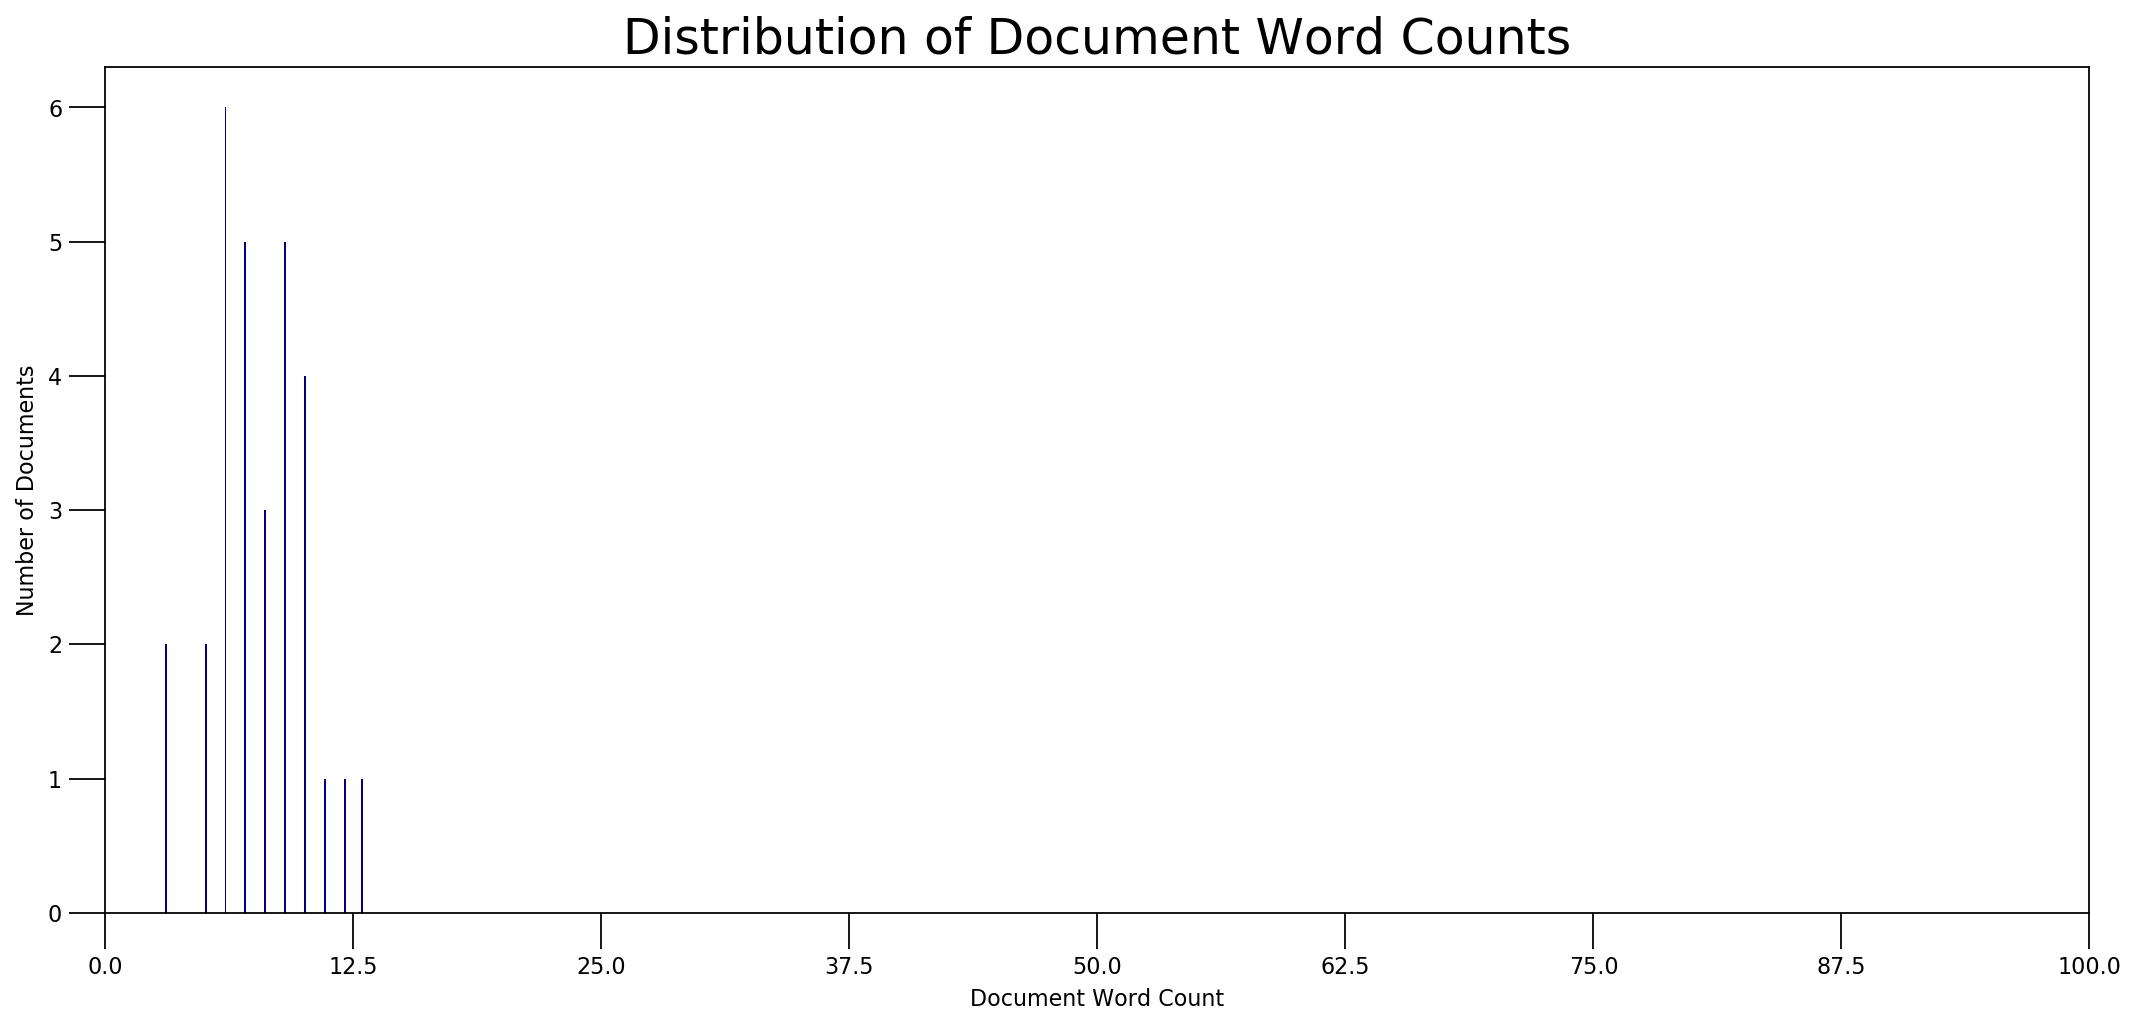

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

b=100#bins
#处理大量文档时，您希望了解整个文档的大小和主题。让我们绘制文档字数统计分布。
doc_lens = [len(d) for d in df_dominant_topic.Text]

# Plot
plt.figure(figsize=(16,7), dpi=160)
plt.hist(doc_lens, bins = b, color='navy')
#plt.text(750, 100, "Mean   : " + str(round(np.mean(doc_lens))))
#plt.text(750,  90, "Median : " + str(round(np.median(doc_lens))))
#plt.text(750,  80, "Stdev   : " + str(round(np.std(doc_lens))))
#plt.text(750,  70, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
#plt.text(750,  60, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, b), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,b,9))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
plt.show()


D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


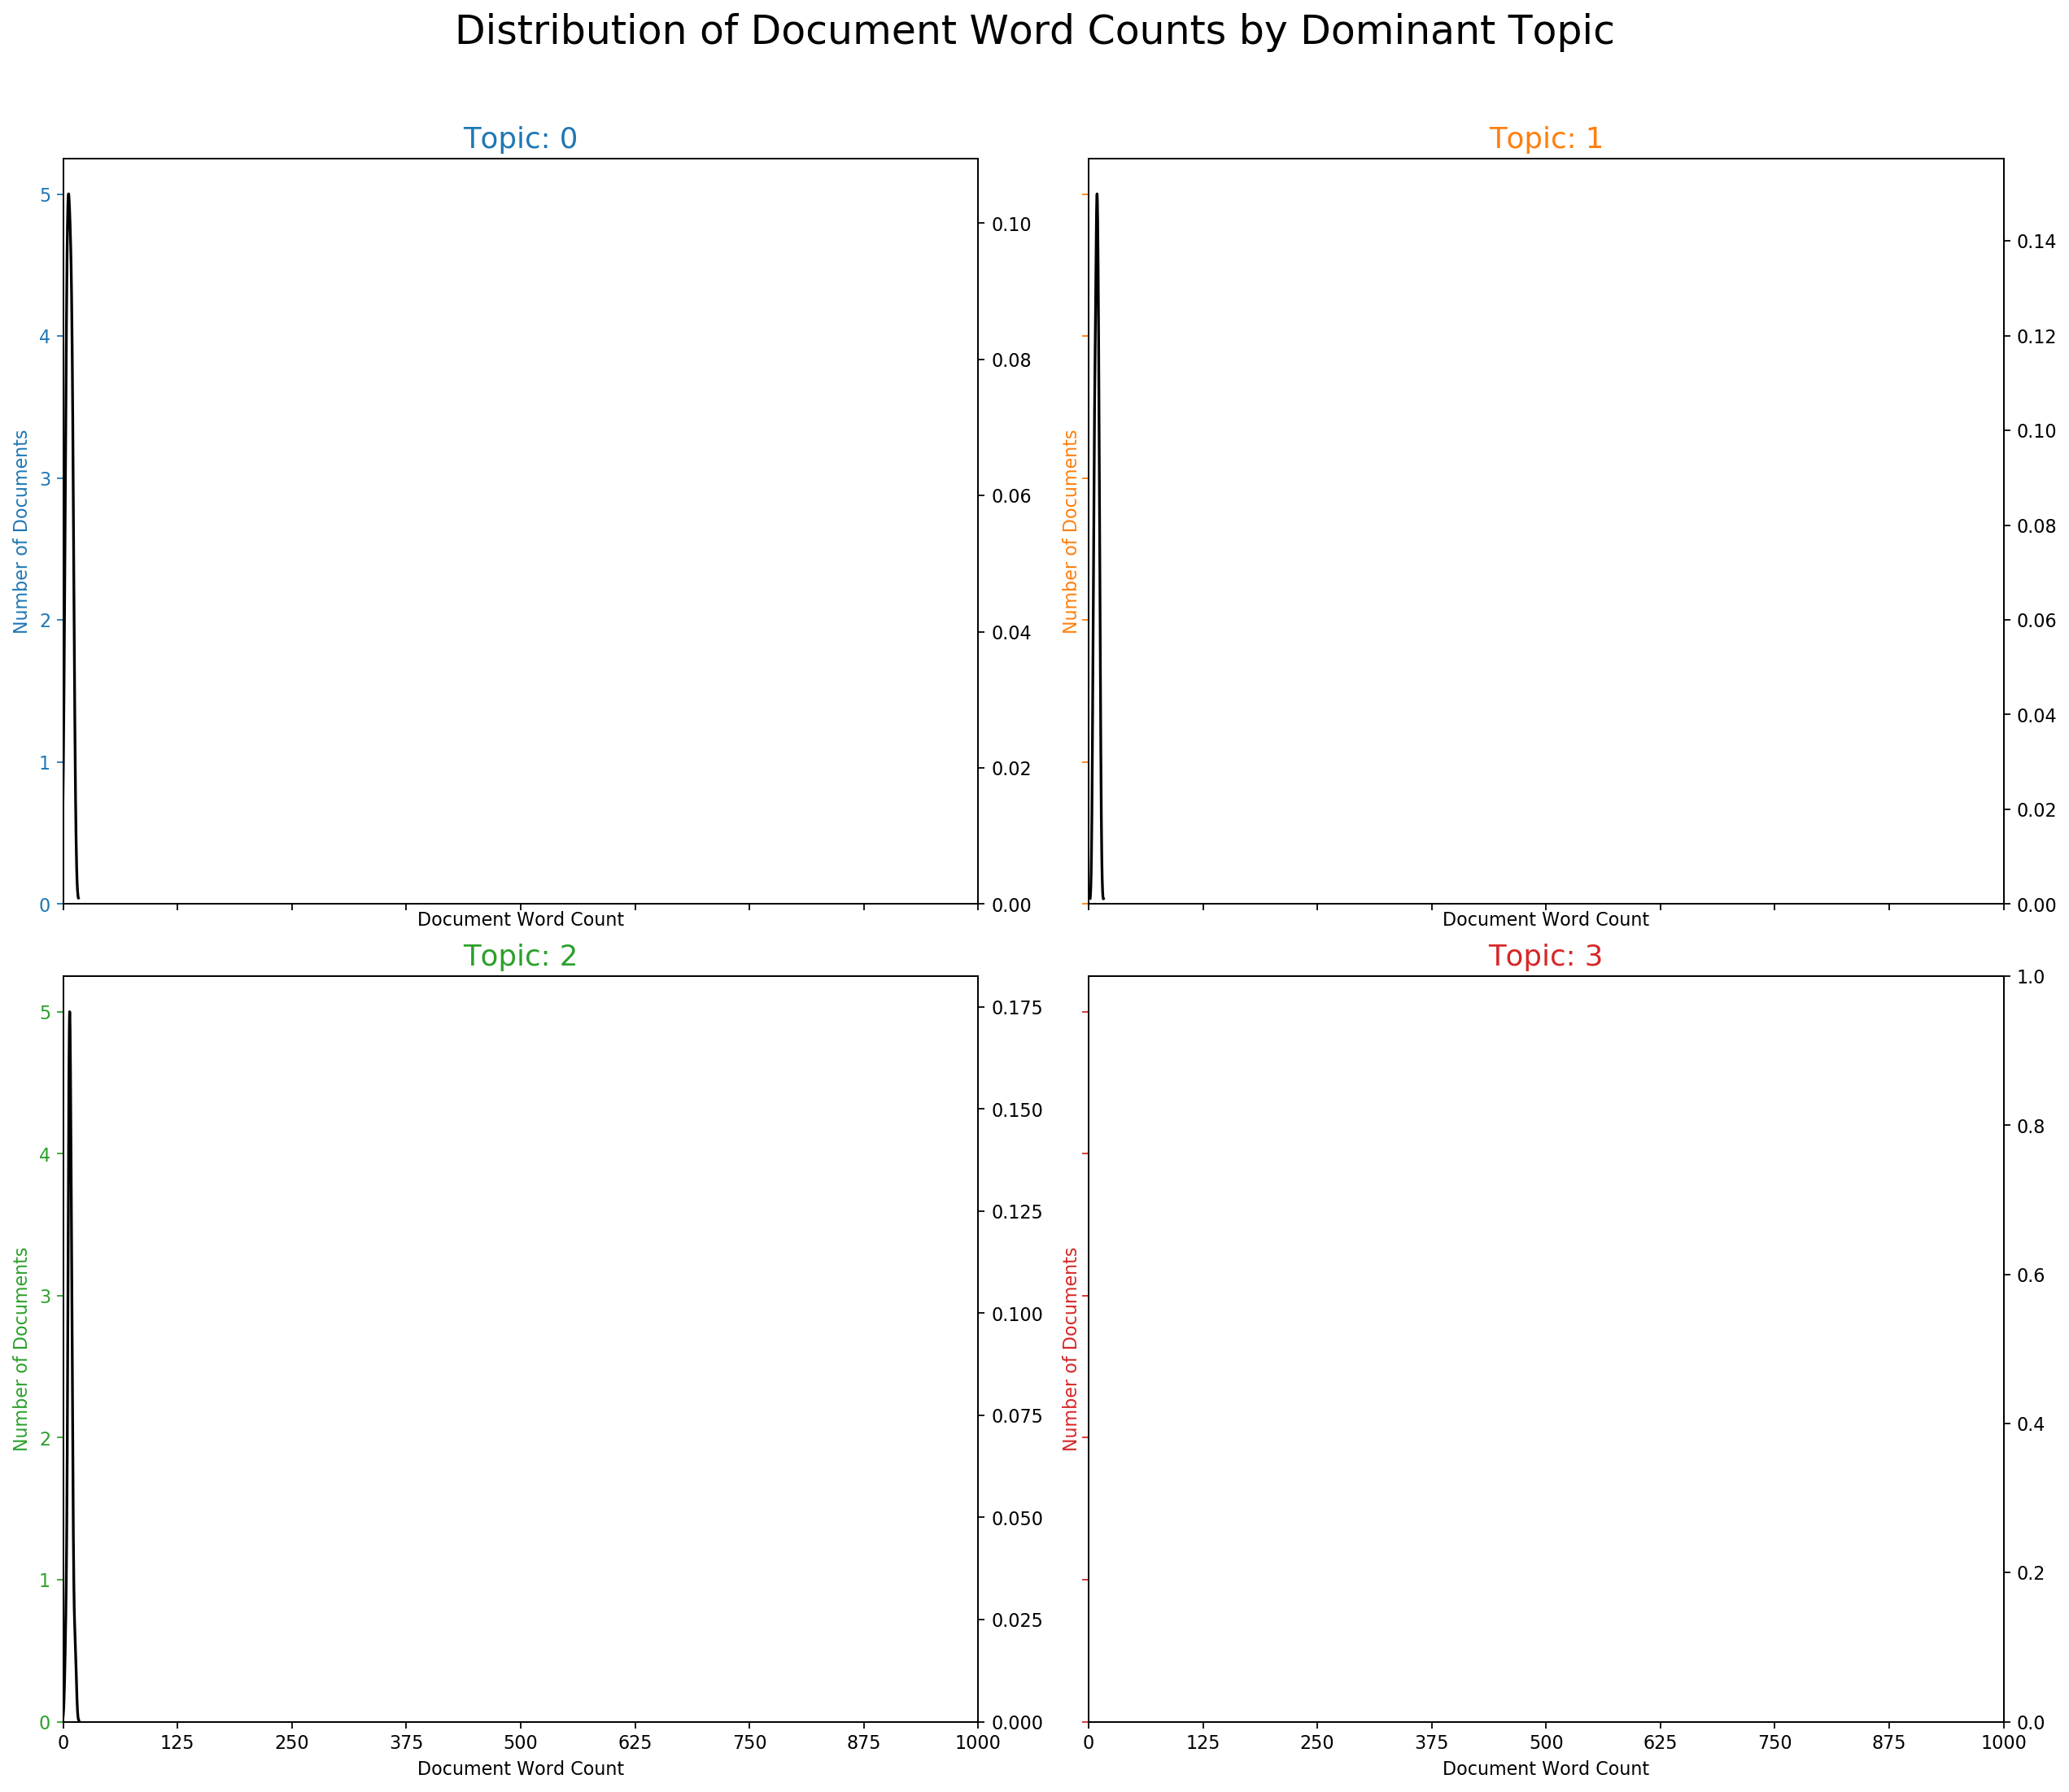

In [10]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(2,2,figsize=(16,14), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 1000, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 1000), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,1000,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()

In [11]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

ModuleNotFoundError: No module named 'wordcloud'

In [13]:
from collections import Counter
topics = model.show_topics(formatted=False)
data_flat = [w for w_list in data_ready for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

NameError: name 'data_ready' is not defined